In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import pandas as pd

In [4]:
train = pd.read_csv('/content/drive/My Drive/kaggle_Digit-Recognizer/train.csv')
test = pd.read_csv('/content/drive/My Drive/kaggle_Digit-Recognizer/test.csv')
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
import seaborn as sns
%matplotlib inline
import numpy as np
np.random.seed(2)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
X = train.drop('label', axis = 1)
y = train.label

In [7]:
X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
y.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [9]:
#We have similar counts for the 10 digits.
y.unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6])

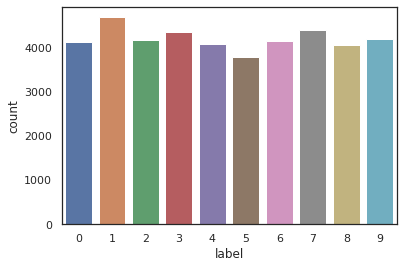

In [10]:
sns.countplot(y)

In [11]:
# Check for null and missing values
X.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [12]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [14]:
#pas de valeurs manquantes

In [15]:
#mis à echelle
# Normalization
X = X/255.0
test = test/255.0

In [16]:
X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
X.shape


(42000, 784)

In [18]:
#Reshape images in 3 dimensions (height = 28px, width = 28px , canal = 1)
# on sait que 784 = 28 X 28
X = X.values.reshape(-1, 28, 28 ,1)
test = test.values.reshape(-1, 28, 28 ,1)

In [19]:
X.shape

(42000, 28, 28, 1)

In [20]:
#Label encoding
#les labels sont  10 digits numbers de 0 à 9. We need to encode these lables to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0]).
y = to_categorical(y, num_classes=10)

In [21]:
y

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [22]:
random_seed = 2

In [23]:
#Split en train et test
X_train,X_test, y_train,y_test = train_test_split(X, y, test_size=0.1, random_state = random_seed)

In [24]:
X_train.shape

(37800, 28, 28, 1)

In [25]:
X_test.shape

(4200, 28, 28, 1)

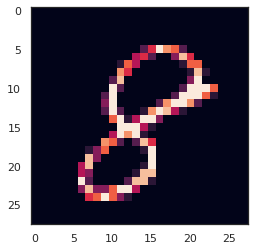

In [26]:
#Visualization
import matplotlib.pyplot as plt
plt.imshow(X_train[0][:,:,0])

In [27]:
#Construction du reseau de Neurone: CNN

model =  Sequential()
#Convolutional Neural Network
model.add(Conv2D(filters= 32, kernel_size= (5,5), input_shape=(28,28,1), activation='relu', padding='same')) # x2 1er couche convolutionale
model.add(Conv2D(filters= 32, kernel_size= (5,5), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))#
model.add(Dropout(0.25))#Elimination de certains neurones pour eviter l'overfitting (25%)

model.add(Conv2D(filters= 64, kernel_size= (3,3), activation='relu', padding='same')) # x2 
model.add(Conv2D(filters= 64, kernel_size= (3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))#
model.add(Dropout(0.25))
#Flatten
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [28]:
#Définir l'optimiseur et l'annealer¶
#Une fois nos couches ajoutées au modèle, nous devons mettre en place une fonction de score, une fonction de perte et un algorithme d'optimisation.

#Nous définissons la fonction de perte pour mesurer les performances de notre modèle sur des images avec des étiquettes connues.
# C'est le taux d'erreur entre les étiquettes observées et les prédites. Nous utilisons une forme spécifique pour les classifications catégorielles (> 2 classes) appelée "categorical_crossentropy".

#La fonction la plus importante est l'optimiseur. Cette fonction améliorera itérativement les paramètres (filtre les valeurs du noyau, les poids et biais des neurones ...) afin de minimiser la perte.

#J'ai choisi RMSprop (avec des valeurs par défaut), c'est un optimiseur très efficace. La mise à jour de RMSProp ajuste la méthode Adagrad d'une manière très simple pour tenter
# de réduire son taux d'apprentissage agressif et monotone décroissant. Nous aurions pu aussi utiliser l'optimiseur Stochastic Gradient Descent ('sgd'), mais il est plus lent que RMSprop.

#La fonction métrique «précision» est utilisée pour évaluer les performances de notre modèle. Cette fonction de mesure est similaire à la fonction de perte, sauf que les résultats de l'évaluation de la mesure ne sont pas utilisés lors de l'apprentissage du modèle (uniquement pour l'évaluation).


In [29]:
#Compile
optimizer = RMSprop(lr=0.001 ,rho=0.9, epsilon=1e-07,decay=0.0)#RMSprop— est un algorithme d'optimisation non publié conçu pour les réseaux de neurones

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
#Afin de faire converger l'optimiseur plus rapidement et au plus près du minimum global de la fonction de perte, j'ai utilisé une méthode de recuit du taux d'apprentissage (LR).

#Le LR est l'étape par laquelle l'optimiseur parcourt le «paysage des pertes». Plus le LR est élevé, plus les étapes sont importantes et plus la convergence est rapide. 
#Cependant, l'échantillonnage est très médiocre avec un LR élevé et l'optimiseur pourrait probablement tomber dans un minimum local.

#Il est préférable d'avoir un taux d'apprentissage décroissant pendant la formation pour atteindre efficacement le minimum global de la fonction de perte.

#Pour conserver l'avantage du temps de calcul rapide avec un LR élevé, j'ai diminué le LR dynamiquement tous les X pas (époques) en fonction du besoin (lorsque la précision n'est pas améliorée).

#Avec la fonction ReduceLROnPlateau de Keras.callbacks, je choisis de réduire le LR de moitié si la précision n'est pas améliorée après 3 époques.

In [31]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [32]:
#Augmentation des données
#Afin d'éviter tout problème de surajustement, nous devons étendre artificiellement notre ensemble de données numériques manuscrites. 
#Nous pouvons agrandir encore plus votre jeu de données existant. L'idée est de modifier les données d'apprentissage avec de petites transformations
# pour reproduire les variations qui se produisent lorsque quelqu'un écrit un chiffre.

In [33]:
# With data augmentation to prevent overfitting (accuracy 0.99286)

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [34]:
#ENTRAINEMENT DU MODEL
epochs = 30 # Turn epochs to 30 to get 0.9967 accuracy
batch_size = 86
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size), 
                              epochs=epochs, validation_data=(X_test,y_test), verbose=2, callbacks=[learning_rate_reduction])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
440/440 - 9s - loss: 0.4048 - accuracy: 0.8699 - val_loss: 0.0797 - val_accuracy: 0.9748
Epoch 2/30
440/440 - 9s - loss: 0.1262 - accuracy: 0.9633 - val_loss: 0.0508 - val_accuracy: 0.9862
Epoch 3/30
440/440 - 9s - loss: 0.0934 - accuracy: 0.9731 - val_loss: 0.0599 - val_accuracy: 0.9829
Epoch 4/30
440/440 - 9s - loss: 0.0801 - accuracy: 0.9760 - val_loss: 0.0320 - val_accuracy: 0.9902
Epoch 5/30
440/440 - 9s - loss: 0.0711 - accuracy: 0.9794 - val_loss: 0.0303 - val_accuracy: 0.9895
Epoch 6/30
440/440 - 9s - loss: 0.0694 - accuracy: 0.9800 - val_loss: 0.0284 - val_accuracy: 0.9919
Epoch 7/30
440/440 - 10s - loss: 0.0625 - accuracy: 0.9819 - val_loss: 0.0331 - val_accuracy: 0.9907
Epoch 8/30
440/440 - 9s - loss: 0.0610 - accuracy: 0.9825 - val_loss: 0.0240 - val_accuracy: 0.9921
Epoch 9/30
440/440 - 9s - loss: 0.0629 - accuracy: 0.9823 - val_loss: 0.0229 - val_accuracy: 0.9924
Epoch 10/30
440/440 - 9

In [35]:
#Evaluate the model
# Training and validation curves

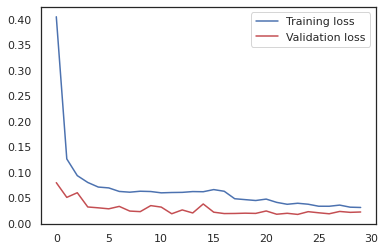

In [36]:
# Plot the loss and accuracy curves for training and validation 
# LOSS
plt.plot(history.history['loss'], color = 'b', label='Training loss')
plt.plot(history.history['val_loss'], color = 'r', label='Validation loss')

plt.legend()
plt.show()

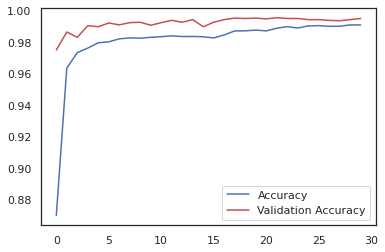

In [37]:
# ACCURACY
plt.plot(history.history['accuracy'], color = 'b', label='Accuracy')
plt.plot(history.history['val_accuracy'], color = 'r', label='Validation Accuracy')

plt.legend()
plt.show()

In [38]:
#The code below is for plotting loss and accuracy curves for training and validation
#The model reaches almost 99% accuracy The validation accuracy is greater than the training accuracy almost evry 
#time during the training. That means that our model dosen't not overfit the training set.
#Our model is very well trained !!!

In [39]:
 #Confusion matrix
 #Confusion matrix can be very helpfull to see your model drawbacks.

#I plot the confusion matrix of the validation results.

In [40]:
# Look at confusion matrix 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [41]:
# Predict the values from the validation dataset
y_pred = model.predict(X_test)

In [42]:
# Convert predictions classes to one hot vectors
y_pred_classe = np.argmax(y_pred , axis=1)

In [43]:
y_pred_classe

array([6, 9, 5, ..., 2, 2, 6])

In [44]:
# Convert validation observations to one hot vectors
y_true = np.argmax(y_test , axis=1)

In [45]:
y_true


array([6, 9, 5, ..., 2, 2, 6])

In [46]:
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classe) 
# plot the confusion matrix

In [47]:
import seaborn as sns

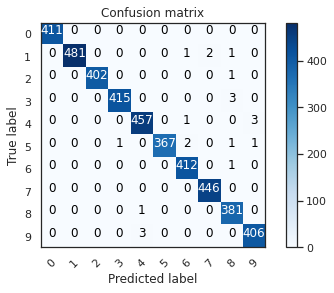

In [48]:
#sns.heatmap(confusion_matrix , annot=True, fmt='d')
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

In [49]:
# predict results
results = model.predict(test)

In [50]:
# 
results = np.argmax(results,axis = 1)